I have appended all the datasets in *mycsv*

# Importing all the Libraries

In [52]:
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import os
import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tahmid/mycsv


Reading the dataframe

In [54]:
df=pd.read_csv('/kaggle/input/tahmid/mycsv')


In [55]:
df

,Unnamed: 0,Time,UNIX_T,RSSI1,RSSI2,RSSI3,Lux,Acc_x,Acc_y,Acc_z,Temp,ID,Pos,Si,Co,Ro
0,0,2017-09-20 16:48:33.959,1505918913959,63,66,63,30,-1103,-19,110,2152,1,123,1,2,3
1,1,2017-09-20 16:48:34.012,1505918914012,57,69,61,30,-1035,14,98,2162,2,122,1,2,2
2,2,2017-09-20 16:48:34.063,1505918914063,53,62,62,34,-1090,-51,141,2055,3,132,1,3,2
3,3,2017-09-20 16:48:34.113,1505918914113,60,59,57,28,-1078,1,117,2086,4,113,1,1,3
4,4,2017-09-20 16:48:34.164,1505918914164,56,68,58,12,-1051,-51,111,28548,5,213,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57194,981,2017-09-20 16:52:51.845,1505919171845,45,63,60,9,-1099,-42,132,2136,17,142,1,4,2
57195,982,2017-09-20 16:52:51.891,1505919171891,56,73,44,3,-1054,-36,125,2099,18,223,2,2,3
57196,983,2017-09-20 16:52:51.997,1505919171997,53,63,63,8,-1067,15,114,2161,20,141,1,4,1
57197,984,2017-09-20 16:52:52.039,1505919172039,54,62,65,8,-1062,-22,114,2150,21,199,1,9,9


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57199 entries, 0 to 57198
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57199 non-null  int64 
 1   Time        57199 non-null  object
 2   UNIX_T      57199 non-null  int64 
 3   RSSI1       57199 non-null  int64 
 4   RSSI2       57199 non-null  int64 
 5   RSSI3       57199 non-null  int64 
 6   Lux         57199 non-null  int64 
 7   Acc_x       57199 non-null  int64 
 8   Acc_y       57199 non-null  int64 
 9   Acc_z       57199 non-null  int64 
 10  Temp        57199 non-null  int64 
 11  ID          57199 non-null  int64 
 12  Pos         57199 non-null  int64 
 13  Si          57199 non-null  int64 
 14  Co          57199 non-null  int64 
 15  Ro          57199 non-null  int64 
dtypes: int64(15), object(1)
memory usage: 7.0+ MB


In [57]:
drop_cols = ['Time', 'Si','Co', 'Ro'] 
df = df.drop(drop_cols, axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57199 entries, 0 to 57198
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  57199 non-null  int64
 1   UNIX_T      57199 non-null  int64
 2   RSSI1       57199 non-null  int64
 3   RSSI2       57199 non-null  int64
 4   RSSI3       57199 non-null  int64
 5   Lux         57199 non-null  int64
 6   Acc_x       57199 non-null  int64
 7   Acc_y       57199 non-null  int64
 8   Acc_z       57199 non-null  int64
 9   Temp        57199 non-null  int64
 10  ID          57199 non-null  int64
 11  Pos         57199 non-null  int64
dtypes: int64(12)
memory usage: 5.2 MB


# Data Plotting

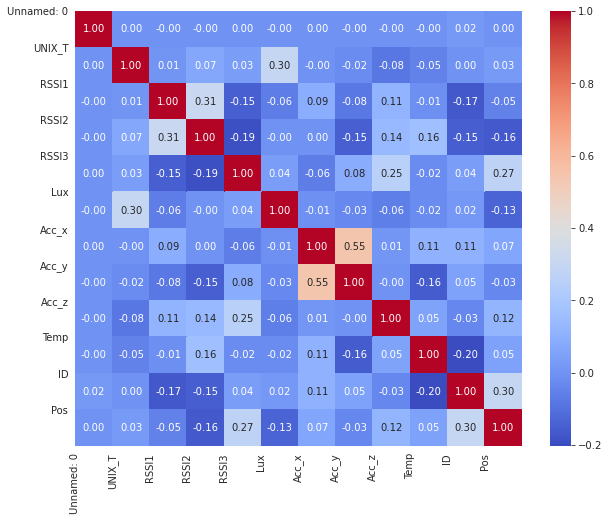

In [59]:
corr = df.corr()

#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

<AxesSubplot:>

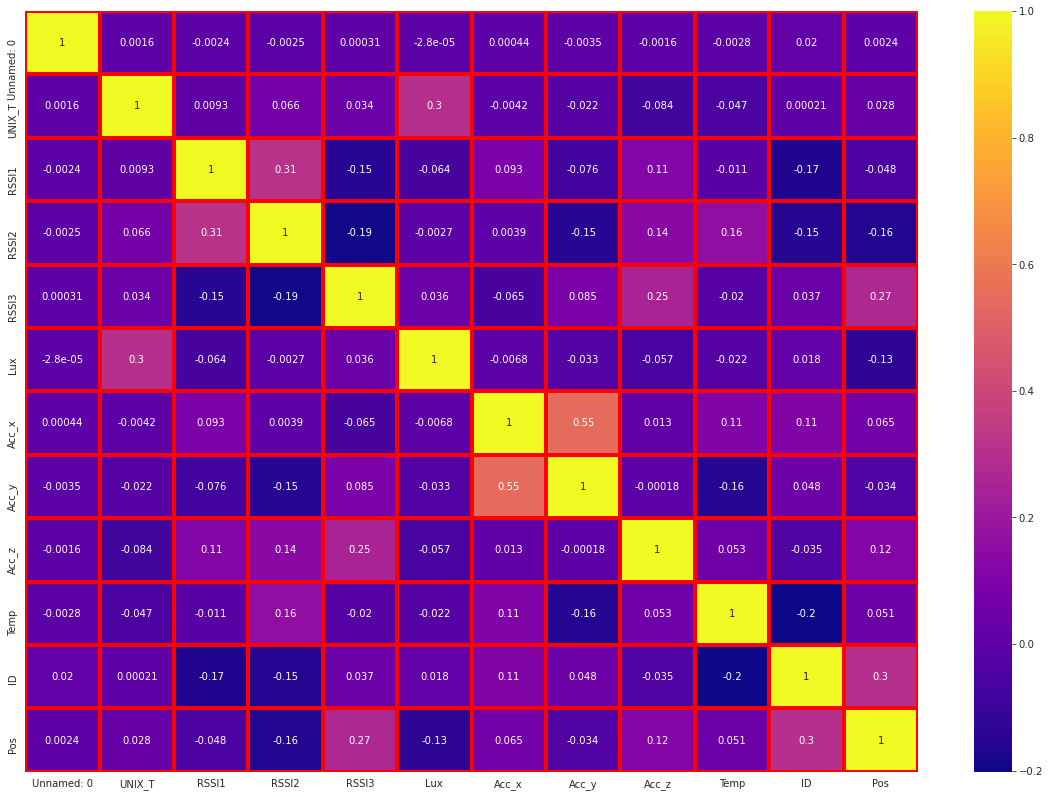

In [60]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

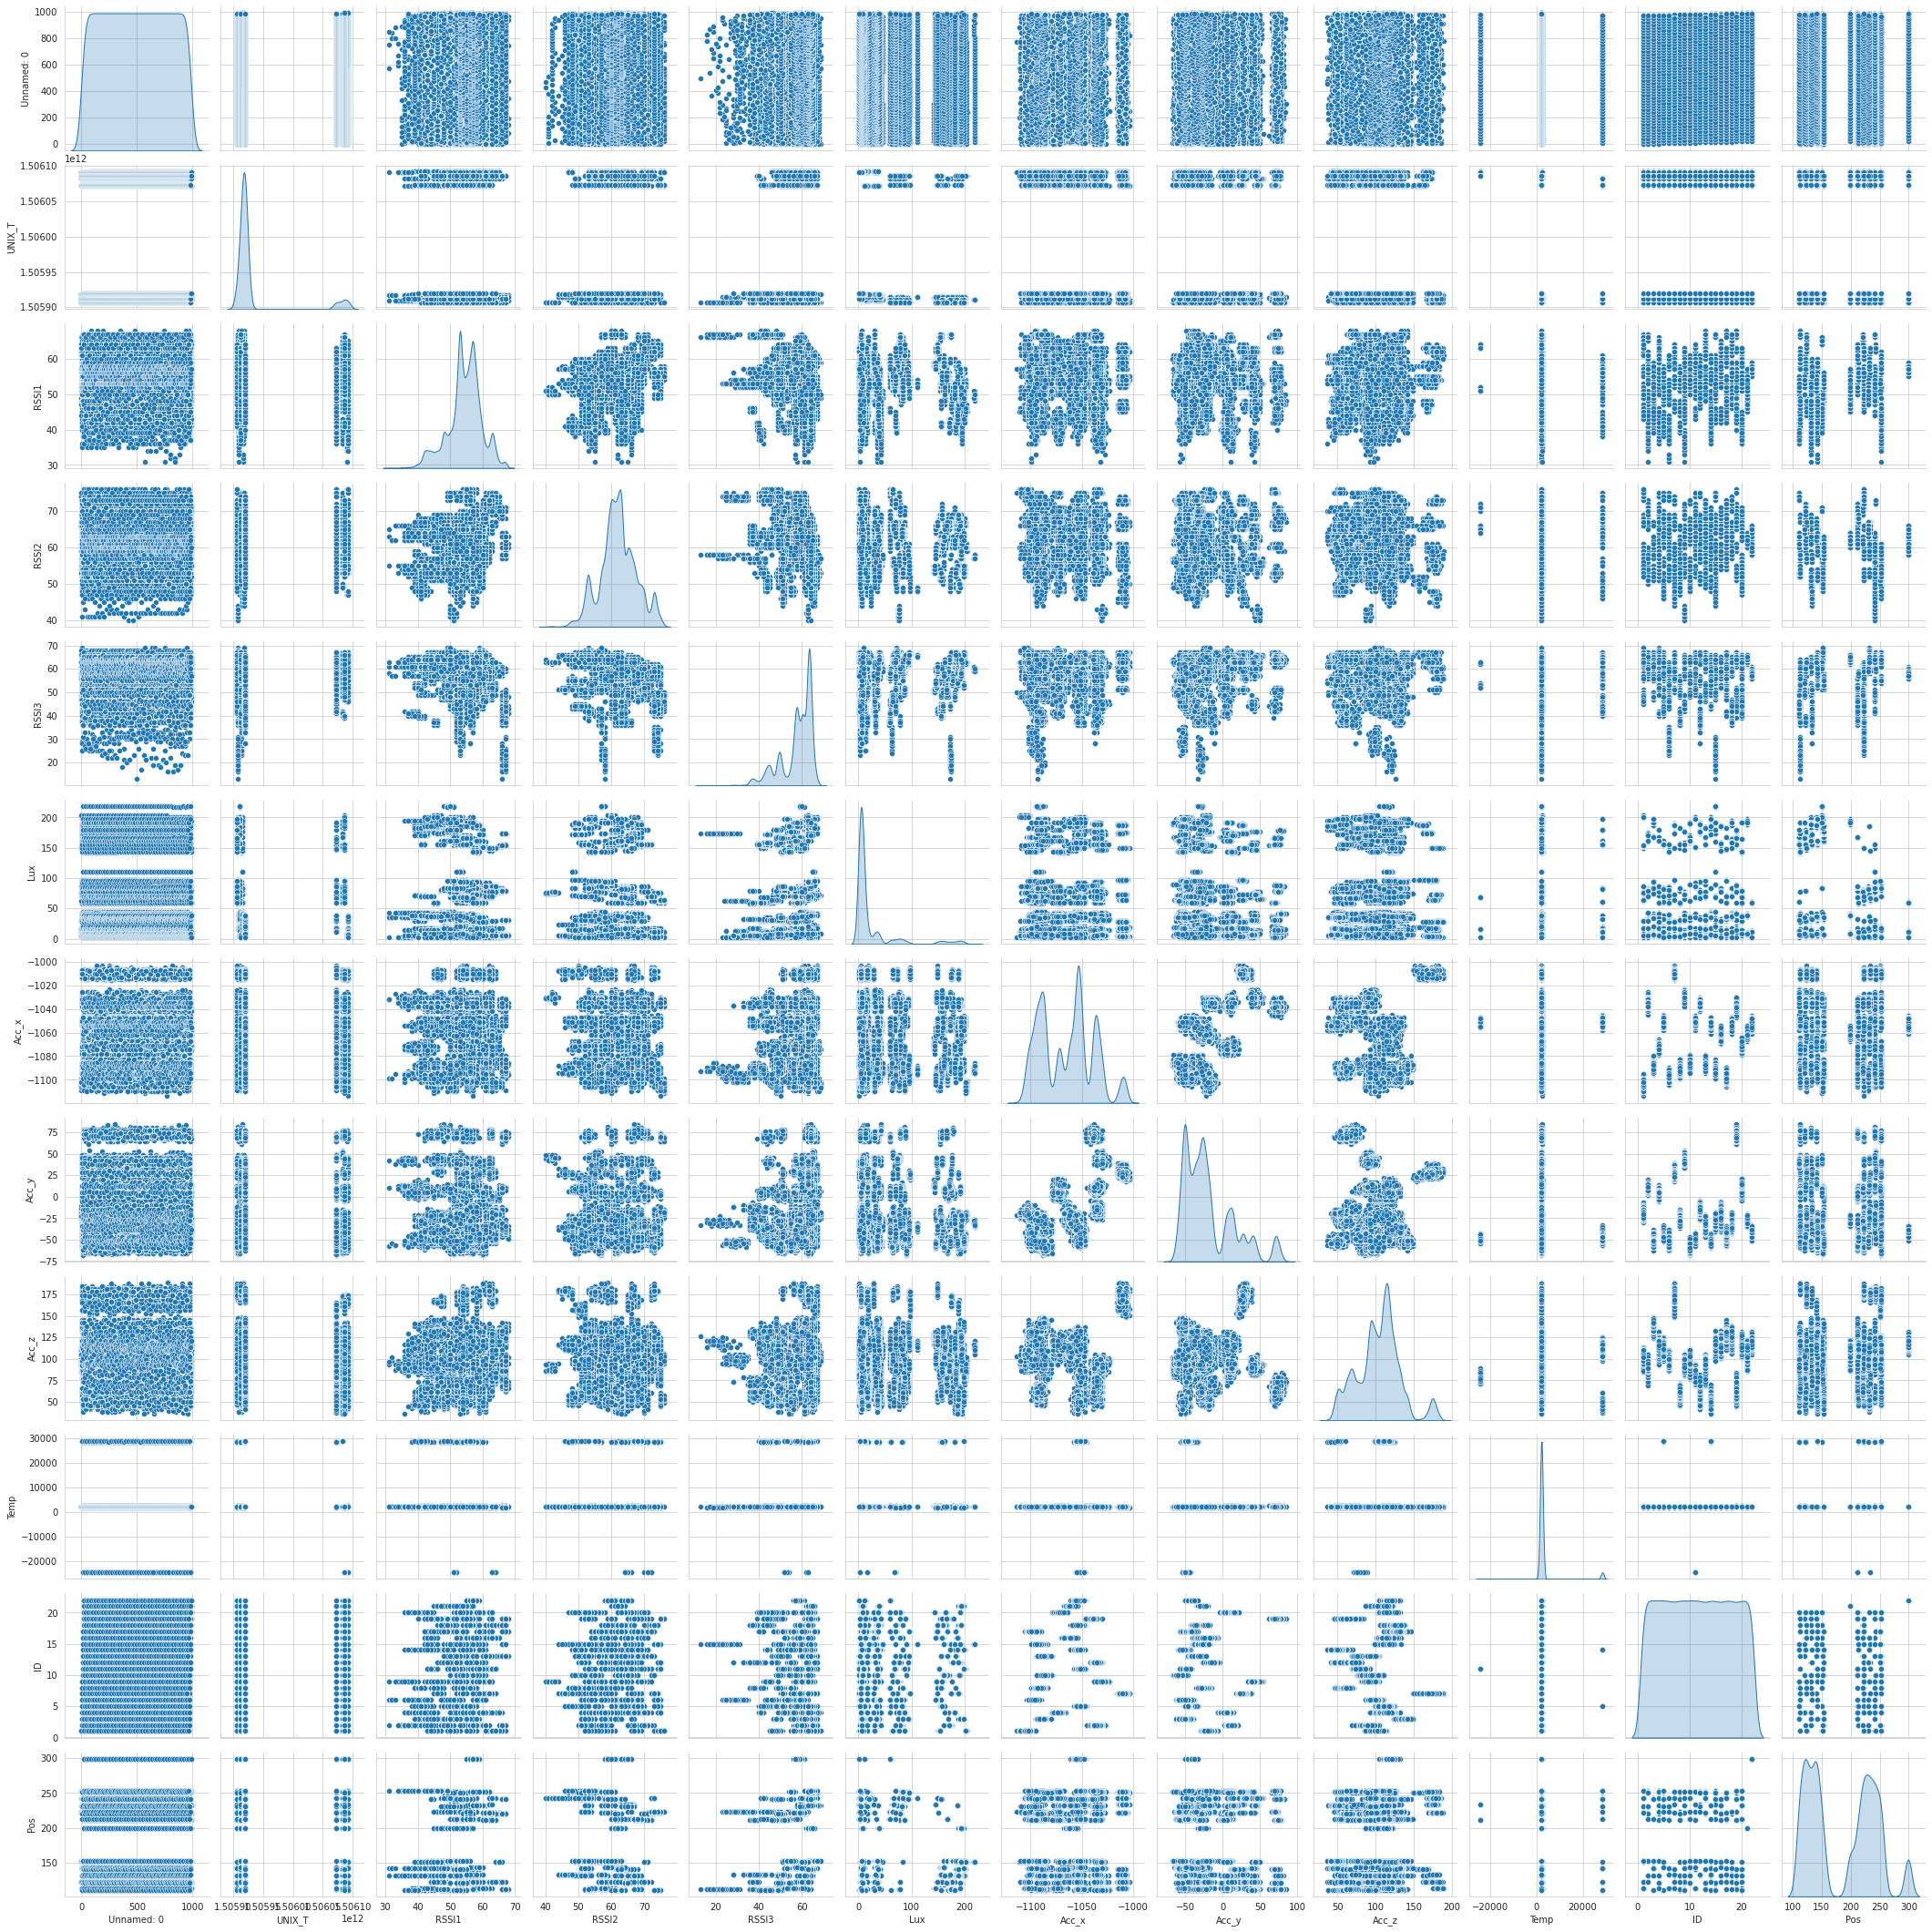

In [61]:
sns.pairplot(df,diag_kind="kde")
plt.show()

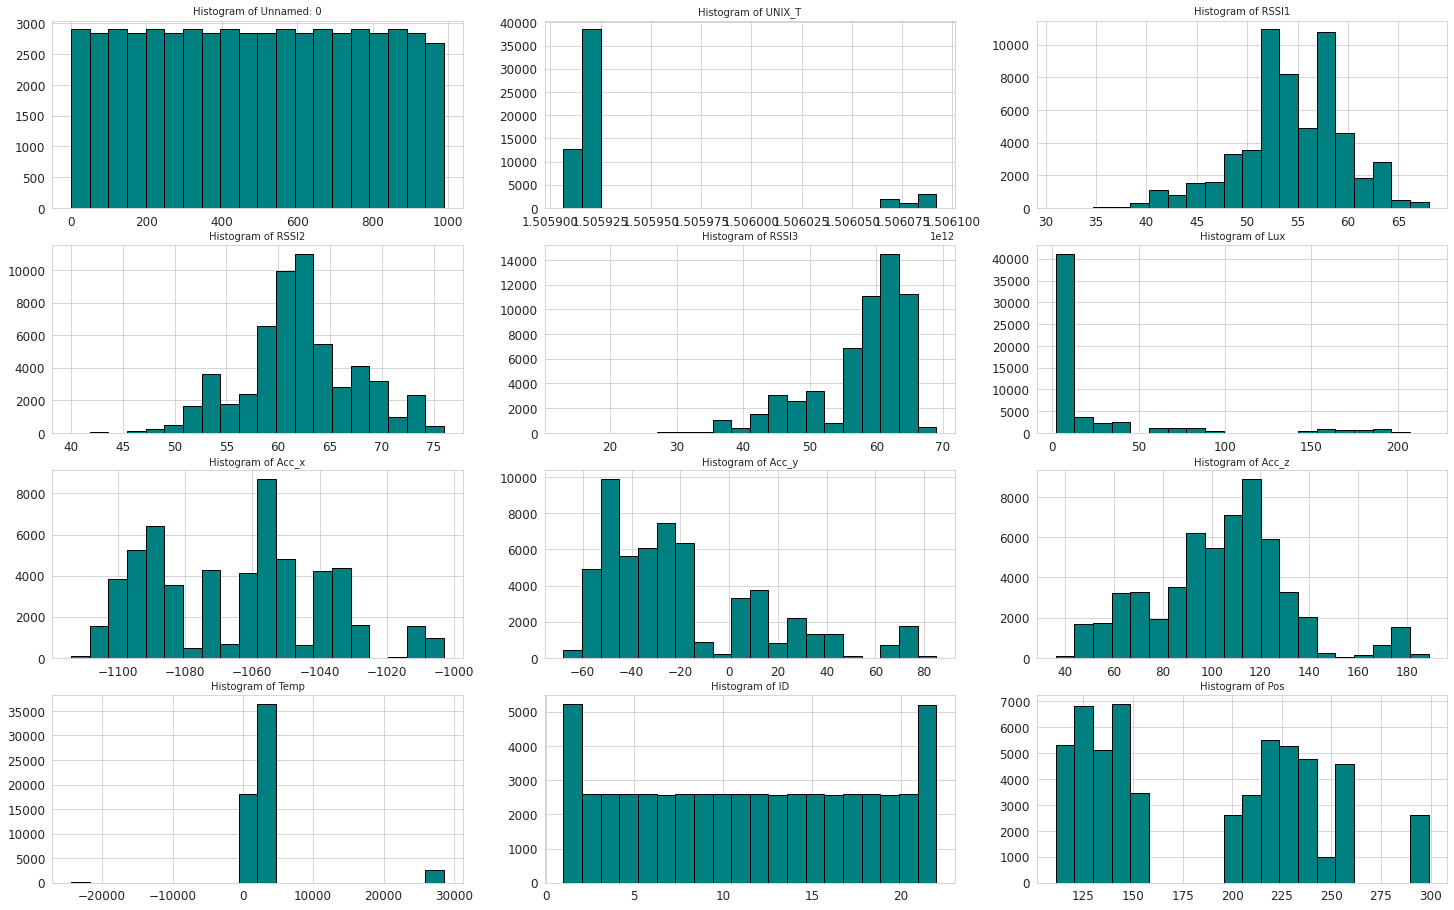

In [62]:
i=1
plt.figure(figsize=(25,20))
for c in df.describe().columns[:]:
    plt.subplot(5,3,i)
    plt.title(f"Histogram of {c}",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='teal',edgecolor='k')
    i+=1
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


''

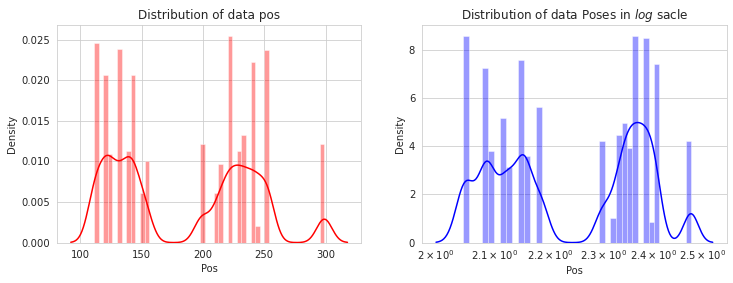

In [47]:
fig = plt.figure(figsize=(12,4))

ax=fig.add_subplot(121)
sns.distplot(df['Pos'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of data pos')

ax=fig.add_subplot(122)
sns.distplot(np.log10(df['Pos']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of data Poses in $log$ sacle')
ax.set_xscale('log')
""

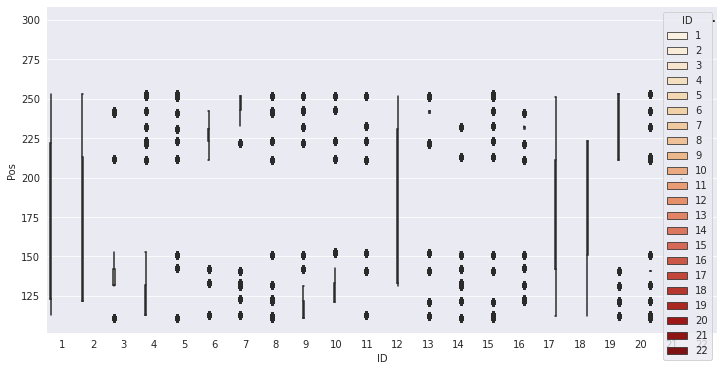

In [63]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x='ID', y='Pos', data = df, palette='OrRd', hue='ID')
sns.despine(left=True)

# Data Preprocessing

In [49]:
X=df.drop('Pos', axis=1)
y=df['Pos'] 

In [50]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (40039, 15)
Shape of X_test:  (17160, 15)
Shape of y_train:  (40039,)
Shape of y_test (17160,)


# Data Standardization/ Feature Scaling

In [21]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [22]:
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# XGBoost

In [26]:
xgb = XGBClassifier(n_estimators=1500)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's prediction accuracy is: 99.99
Time consumed for training: 162.435
Time consumed for prediction: 1.34173 seconds


# K- Nearest Neighbour

In [27]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 60.43
Time consumed for training: 0.088 seconds
Time consumed for prediction: 0.53839 seconds


# Scitkit-Learn's Random Forest Classifier

In [28]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 99.99
Time consumed for training: 0.380 seconds
Time consumed for prediction: 0.04654 seconds
